In [1]:
import os
#import sys
import torch
import torch.nn as nn
import torch.utils.data as Data
import torchvision
import matplotlib.pyplot as plt

#sys.path.append('../')
from data.load_data import *
from models.neural_networks import *
from train.train_cnn import *
from train.train_fcn import *
from train.train_semihebb import *
from evaluation.test import *
from utils.others import *
from utils.plot import *
from utils.save_model import *

# Train with Hebb rule

note that hebbian weights goes to infinity, values will be NaN after they go out of the range, so tSNE plot cannot be used.

60000
10000


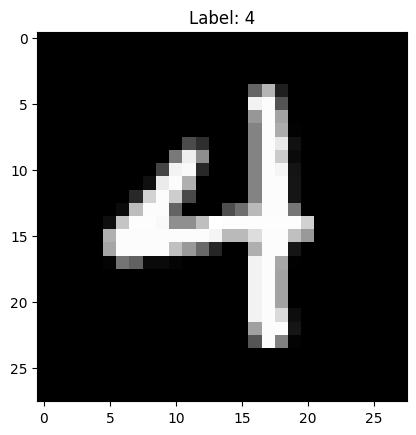

Epoch: 0, Step: 0, Loss: 2.320737838745117, Accuracy: 11.35%
Epoch: 0, Step: 50, Loss: 1.9118914604187012, Accuracy: 31.28%
Epoch: 0, Step: 100, Loss: 1.8061134815216064, Accuracy: 36.31%
Epoch: 0, Step: 150, Loss: 1.562354564666748, Accuracy: 49.0%
Epoch: 0, Step: 200, Loss: 1.3082427978515625, Accuracy: 59.44%
Epoch: 0, Step: 250, Loss: 1.6132625341415405, Accuracy: 67.73%
Epoch: 0, Step: 300, Loss: 1.298007845878601, Accuracy: 69.16%
Epoch: 0, Step: 350, Loss: 1.1100846529006958, Accuracy: 66.96%
Epoch: 0, Step: 400, Loss: 1.1102190017700195, Accuracy: 75.45%
Epoch: 0, Step: 450, Loss: 1.1770377159118652, Accuracy: 65.27%
Epoch: 0, Step: 500, Loss: 0.8903278112411499, Accuracy: 75.43%
Epoch: 0, Step: 550, Loss: 0.7944438457489014, Accuracy: 65.44%
Epoch: 0, Step: 600, Loss: 0.9019562005996704, Accuracy: 83.08%
Epoch: 0, Step: 650, Loss: 0.6638520956039429, Accuracy: 81.49%
Epoch: 0, Step: 700, Loss: 0.7416394948959351, Accuracy: 71.66%
Epoch: 0, Step: 750, Loss: 0.8208505511283875, 

In [2]:
# torch.manual_seed(1)    # reproducible

# Hyper Parameters
EPOCH = 1               
BATCH_SIZE = 50
LR = 0.001             
TSNE = True

#load MNIST dataset
train_loader, test_loader = load_mnist(BATCH_SIZE)
print(len(train_loader.dataset))
print(len(test_loader.dataset))
#load CIFAR-10 dataset


# Plot one example
plot_example(train_loader)

TSNE = False

# create model instance

hebbnet = HebbNet([784,2000],lr=LR,require_hebb=True,activation=True,update_rule='hebb',p=None)
fcn = FCN([2000,10])

semihebbnet = SemiHebbNet(hebbnet, fcn)

# optimizer and loss function
optimizer = torch.optim.Adam(semihebbnet.parameters(), lr=LR)  
loss_func = nn.CrossEntropyLoss()                       # the target label is not one-hotted

# train networks
train_semihebb(model=semihebbnet, train_loader=train_loader, test_loader=test_loader, optimizer=optimizer, loss_func=loss_func, epochs=EPOCH, tsne_enabled=TSNE)

In [3]:
# test accuracy
test_accuracy(model=semihebbnet, dataset='mnist', flatten_input=True)

Accuracy of the SemiHebbNet on the MNIST test images: 78.5%


78.5

# Train with Oja's rule

In [4]:
# Hyper Parameters
EPOCH = 1               
BATCH_SIZE = 50
LR = 0.0001             
TSNE = False

#load MNIST dataset
train_loader, test_loader = load_mnist(BATCH_SIZE)
print(len(train_loader.dataset))
print(len(test_loader.dataset))

# create model instance
hebbnet = HebbNet([784,2000],lr=LR,require_hebb=True,activation=True,update_rule='oja',p=None)
fcn = FCN([2000,10])

semihebbnet = SemiHebbNet(hebbnet, fcn)

# optimizer and loss function
optimizer = torch.optim.Adam(semihebbnet.parameters(), lr=LR)  
loss_func = nn.CrossEntropyLoss()                  

# train networks
train_semihebb(model=semihebbnet, train_loader=train_loader, test_loader=test_loader, optimizer=optimizer, loss_func=loss_func, epochs=EPOCH, tsne_enabled=TSNE)

60000
10000
Epoch: 0, Step: 0, Loss: 2.314085006713867, Accuracy: 9.43%
Epoch: 0, Step: 50, Loss: 2.2312917709350586, Accuracy: 29.21%
Epoch: 0, Step: 100, Loss: 2.1097075939178467, Accuracy: 54.85%
Epoch: 0, Step: 150, Loss: 1.9586182832717896, Accuracy: 61.1%
Epoch: 0, Step: 200, Loss: 1.864109992980957, Accuracy: 63.63%
Epoch: 0, Step: 250, Loss: 1.6955351829528809, Accuracy: 70.86%
Epoch: 0, Step: 300, Loss: 1.6053637266159058, Accuracy: 68.47%
Epoch: 0, Step: 350, Loss: 1.5876286029815674, Accuracy: 70.69%
Epoch: 0, Step: 400, Loss: 1.4423426389694214, Accuracy: 77.01%
Epoch: 0, Step: 450, Loss: 1.4346058368682861, Accuracy: 76.99%
Epoch: 0, Step: 500, Loss: 1.3831783533096313, Accuracy: 79.45%
Epoch: 0, Step: 550, Loss: 1.293118953704834, Accuracy: 80.01%
Epoch: 0, Step: 600, Loss: 1.2180126905441284, Accuracy: 81.03%
Epoch: 0, Step: 650, Loss: 1.204261302947998, Accuracy: 81.51%
Epoch: 0, Step: 700, Loss: 1.1364930868148804, Accuracy: 82.05%
Epoch: 0, Step: 750, Loss: 1.06422257

In [5]:
# test accuracy
test_accuracy(model=semihebbnet, dataset='mnist', flatten_input=True)

Accuracy of the SemiHebbNet on the MNIST test images: 84.34%


84.34

# Train with Gupta's rule

In [2]:
# Hyper Parameters
EPOCH = 3               
BATCH_SIZE = 50
LR = 0.001             
TSNE = False

#load MNIST dataset
train_loader, test_loader = load_mnist(BATCH_SIZE)
print(len(train_loader.dataset))
print(len(test_loader.dataset))

# create model instance
hebbnet = HebbNet([784,2000],lr=LR,require_hebb=True,activation=True,update_rule='gupta',p=60)
fcn = FCN([2000,10])

semihebbnet = SemiHebbNet(hebbnet, fcn)

# optimizer and loss function
optimizer = torch.optim.Adam(semihebbnet.parameters(), lr=LR)  
loss_func = nn.CrossEntropyLoss()                  

# train networks
train_semihebb(model=semihebbnet, train_loader=train_loader, test_loader=test_loader, optimizer=optimizer, loss_func=loss_func, epochs=EPOCH, tsne_enabled=TSNE)

60000
10000
Epoch: 0, Step: 0, Loss: 2.314798355102539, Accuracy: 17.83%
Epoch: 0, Step: 50, Loss: 1.0973141193389893, Accuracy: 78.38%
Epoch: 0, Step: 100, Loss: 0.7684252262115479, Accuracy: 84.81%
Epoch: 0, Step: 150, Loss: 0.666536808013916, Accuracy: 86.29%
Epoch: 0, Step: 200, Loss: 0.5300126671791077, Accuracy: 87.66%
Epoch: 0, Step: 250, Loss: 0.7640625238418579, Accuracy: 87.74%
Epoch: 0, Step: 300, Loss: 0.4310745894908905, Accuracy: 89.13%
Epoch: 0, Step: 350, Loss: 0.3499631881713867, Accuracy: 88.95%
Epoch: 0, Step: 400, Loss: 0.5048956274986267, Accuracy: 89.05%
Epoch: 0, Step: 450, Loss: 0.5177027583122253, Accuracy: 89.68%
Epoch: 0, Step: 500, Loss: 0.5507404208183289, Accuracy: 89.77%
Epoch: 0, Step: 550, Loss: 0.4987338185310364, Accuracy: 90.28%
Epoch: 0, Step: 600, Loss: 0.3004152774810791, Accuracy: 90.52%
Epoch: 0, Step: 650, Loss: 0.40719497203826904, Accuracy: 90.44%
Epoch: 0, Step: 700, Loss: 0.321654349565506, Accuracy: 90.73%
Epoch: 0, Step: 750, Loss: 0.3667

In [ ]:
# test accuracy
test_accuracy(model=semihebbnet, dataset='mnist', flatten_input=True)